In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
import requests
import numpy as np
import shap
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
# Charger le modèle
modelANN = load_model("C:\\Users\\etudiant\\Project_ML\\model.h5")
# Charger le dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Vérification
modelANN.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_44 (Flatten)            │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_87          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_50 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_88          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_51 (ReLU)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_168 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 857,100 (3.27 MB)

 Trainable params: 856,074 (3.27 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 2 (12.00 B)

In [91]:
import requests
import numpy as np

# Sélectionner une image aléatoire
image = x_test[21].tolist()  # Convertir l'image en liste pour JSON
label = y_test[21].item()  # Étiquette réelle

# URL de l'API
url = "http://127.0.0.1:5001/predict"

# Requête POST
response = requests.post(url, json={"input": image})

# Afficher la réponse
print(response.json())
print("classe réelle :", label)

{'predicted_class': 0, 'predictions': [[1.0, 0.0, 0.0, 5.265882361982126e-35, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]}
classe réelle : 0


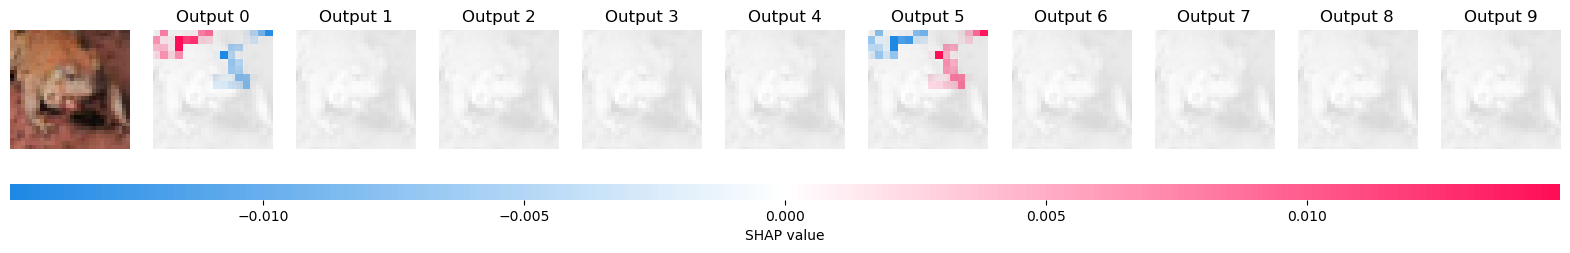

In [41]:
from shap import maskers

# Créer un masker adapté aux images (taille des images = (32, 32, 3))
masker = shap.maskers.Image(x_train[0], (32, 32, 3))

# Créer un explainer SHAP
explainer = shap.Explainer(modelANN, masker)

# Sélectionner une image pour explication
image_to_explain = x_test[5].reshape(1, 32, 32, 3)

# Calculer les valeurs SHAP
shap_values = explainer(image_to_explain)

# Visualiser les explications
shap.image_plot(shap_values, image_to_explain)

Shape de l'image à expliquer : (32, 32, 3)


  0%|          | 0/1000 [00:00<?, ?it/s]

Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Shape des données reçues pour prédiction : (10, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Shape des données reçues pour

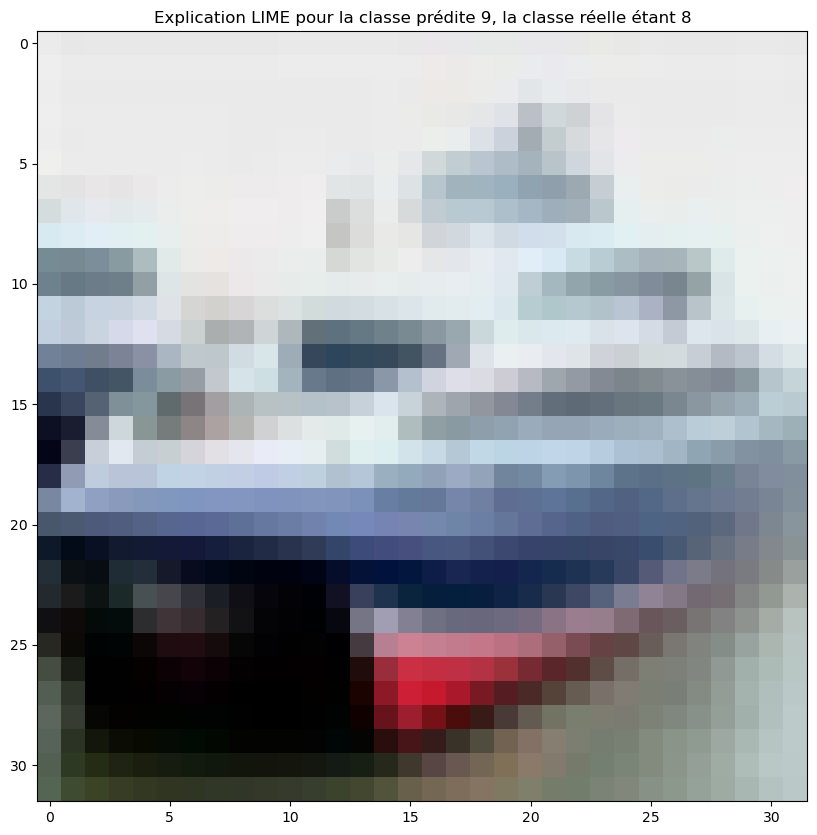

In [13]:
# Vérifier la forme de l'image
print(f"Shape de l'image à expliquer : {image_to_explain.shape}")

# Créer un explainer LIME
explainer = lime_image.LimeImageExplainer()
true_label = y_test[1][0]

# Créer une fonction de prédiction
def predict_fn(images):
    # Convertir les images en tableau NumPy et s'assurer qu'elles ont 4 dimensions
    images = np.array(images)
    print(f"Shape des données reçues pour prédiction : {images.shape}")
    return modelCNN.predict(images)

# Générer une explication LIME
explanation = explainer.explain_instance(
    image_to_explain,         # L'image à expliquer
    predict_fn,               # Fonction de prédiction
    top_labels=1,             # Nombre de classes à expliquer
    hide_color=0,             # Couleur pour masquer les pixels non sélectionnés
    num_samples=1000          # Nombre d'échantillons générés
)

# Obtenir le masque pour la classe prédite
temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],  # Classe prédite
    positive_only=True,               # Montrer uniquement les pixels positifs
    num_features=10,                  # Nombre de superpixels
    hide_rest=True                   # Masquer les pixels non sélectionnés
)

# Visualiser l'explication
plt.figure(figsize=(10, 10))
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title(f"Explication LIME pour la classe prédite {explanation.top_labels[0]}, la classe réelle étant {true_label}")
plt.show()